## Plots from X-ray absorption calculations using ORCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
import csv as csv
from matplotlib.colors import  ListedColormap
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import math

____________________________

In [2]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

--------------

In [4]:
"""
Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


cmaps = [('Sequential (2)', ['cool', 'copper', 'winter']),
         ('Diverging',      ['coolwarm']),
         ('Miscellaneous',  ['gist_rainbow', 'jet', 'brg', 'rainbow'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

#for cmap_category, cmap_list in cmaps:
#    plot_color_gradients(cmap_category, cmap_list)

#plt.show()


--------------

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

#### Pair amino acid interaction between Methionine (M) and Tryptophan (W)

##### System of study: Met $---$Trp (varying inter fragment distances)

### M$---$W ( $n=2.5, 2.6, ..., 3.0, ..., 11.0 \overset{\circ}{A}$  )

In [5]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post=".csv"
#list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
l_tmp = [85, 90, 95, 100, 105]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)
csv_suf = [i/10 for i in list_suf]
for ii in list_suf:
    globals()['mw_%s' % str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['mw_%s' % str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
mw_43

,Energy,Intensity,dx,dy,dz
0,284.00,0.018707,0.017790,0.000361,0.000556
1,284.01,0.020259,0.019265,0.000391,0.000603
2,284.01,0.021935,0.020857,0.000424,0.000654
3,284.02,0.023744,0.022576,0.000460,0.000709
4,284.02,0.025697,0.024430,0.000498,0.000768
...,...,...,...,...,...
2994,295.98,11.637216,11.091988,0.209535,0.335700
2995,295.99,11.045111,10.527541,0.198908,0.318670
2996,295.99,10.480626,9.989427,0.188775,0.302432
2997,296.00,9.942611,9.476553,0.179114,0.286952


In [6]:
list_suf_resume = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,\
                   40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
#list_suf_1 = [30, 35, 40, 45, 50, 55]
#list_suf_2 = [30, 35, 40, 45, 50, 55, 60, 65]

##### Raw spectra

In [7]:
def plot_xray(global_name, list_suf, x_arg, y_arg, label, xlmt=False, xmin=282, xmax=298, \
              scalec=False, ref_list=list_suf, \
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    y_arg arx_arg and e the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected   
    if scalec:
        colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
        
    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
                
    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    plt.legend(loc='upper left');
    plt.show()
    

In [8]:
def plot_alot_xray(global_name, list_suf, x_arg, y_arg, xlmt=False, xmin=282, xmax=298, label=None, \
              scalec=False, ref_list=list_suf, plotsvg=False, nameplt='figure.svg',\
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
    if label==None:
        label=[]
        label=['_nolegend_' for ii in list_suf]

    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1

    cmap = plt.get_cmap("coolwarm", len(list_suf))
    norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(list_suf)),len(list_suf))
    #np.arange(0,len(list_suf)+1)-0.5, len(list_suf))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(0,len(list_suf)))#np.array(list_suf)/10)#ticks=np.arange(0,len(list_suf),2))

    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    #plt.legend(loc='upper left');
    plt.show()
    if plotsvg:
        fig.savefig(nameplt, format="svg")
    

In [9]:
def plot_normal(global_name, x_arg, y_arg, label, xlmt=False, xmin=282, xmax=298, \
              scalec=False, ref_list=62, \
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, 62))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
        
    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=newxrange(global_name, x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name, linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    plt.xlabel('Distance')
    plt.ylabel('Intensity (Oscillator strength)')
    plt.legend(loc='upper left');
    plt.show()

In [10]:
def newxrange(data, col, minl, maxl):
    """
    this function crops a pd data frame
    """
    return data.loc[(data[col]>=minl) & (data[col]<=maxl)]

In [11]:
def getting_max_int(df, min_r, max_r):
    """
    giving a specific range of the data, this function returns the energy when intensity is maximum
    """
    num = df[(df['Energy']<max_r) & (df['Energy']>min_r)]['Intensity'].idxmax()
    try:
        return df.iloc[num][['Energy','Intensity']]
    except IndexError:
        return pd.DataFrame({'Energy': [NaN], 'Intensity': [NaN]})
        

In [12]:
l_tmp = [85, 90, 95, 100, 105]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

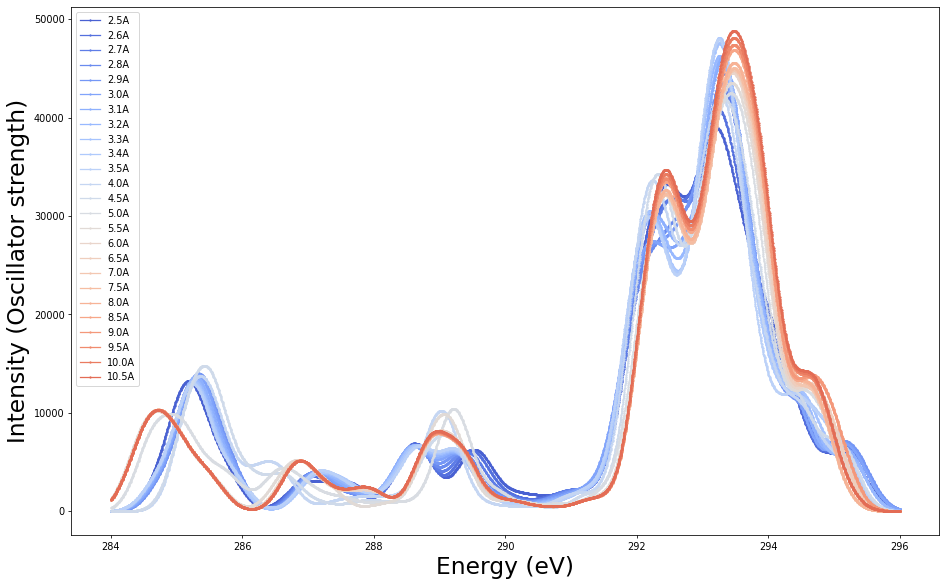

In [13]:
global_name = [globals()['mw_%s' % str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=282, xmax=298)

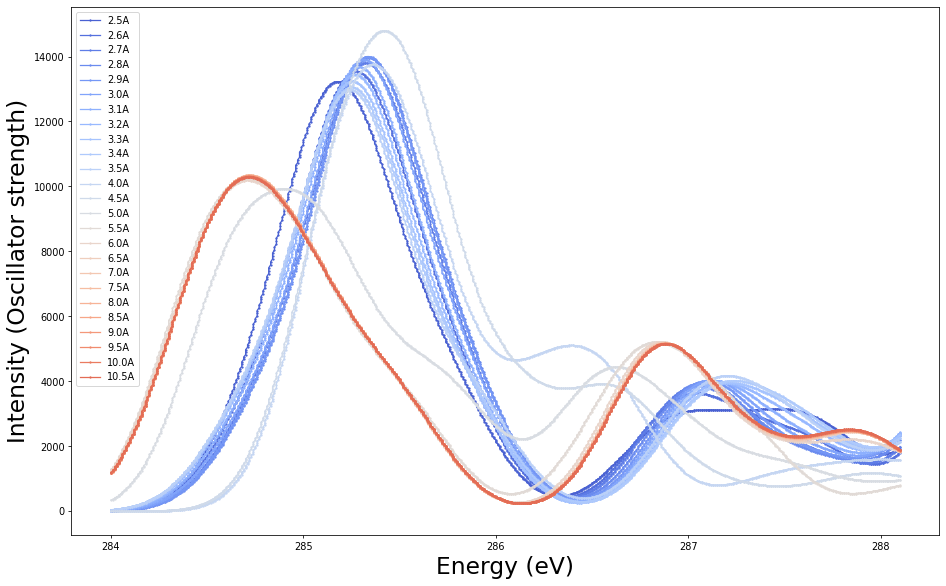

In [14]:
global_name = [globals()['mw_%s' % str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=283, xmax=288.1)

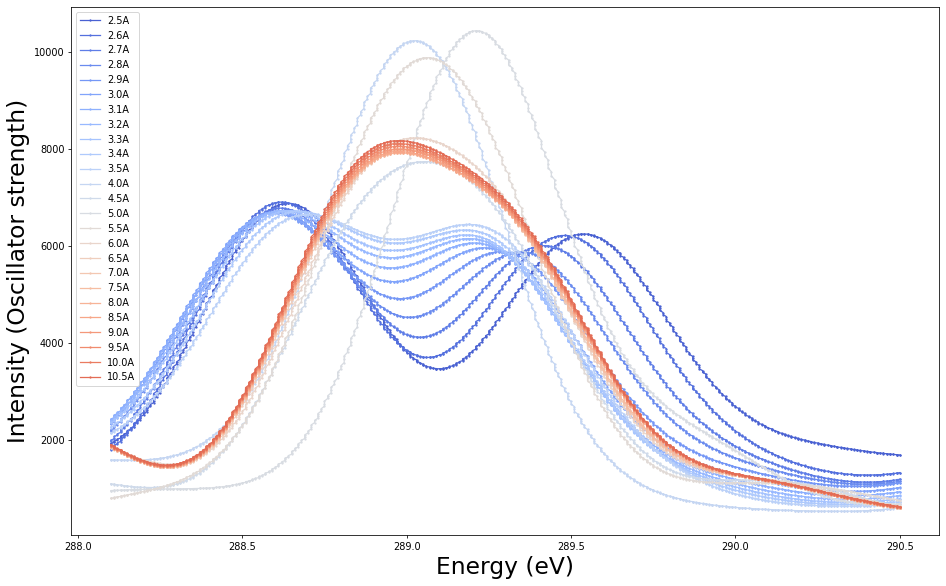

In [15]:
global_name = [globals()['mw_%s' % str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288.1, xmax=290.5)

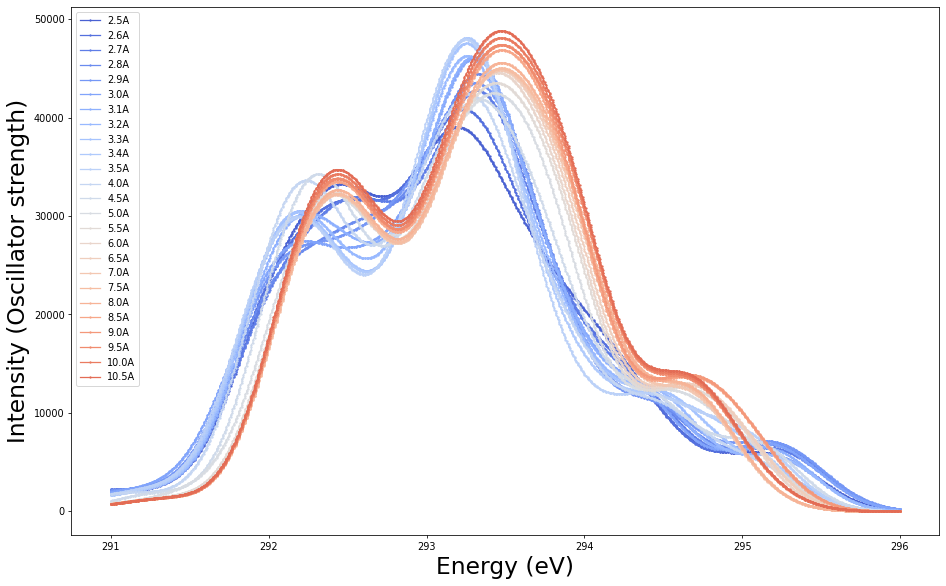

In [16]:
global_name = [globals()['mw_%s' % str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=291, xmax=296)

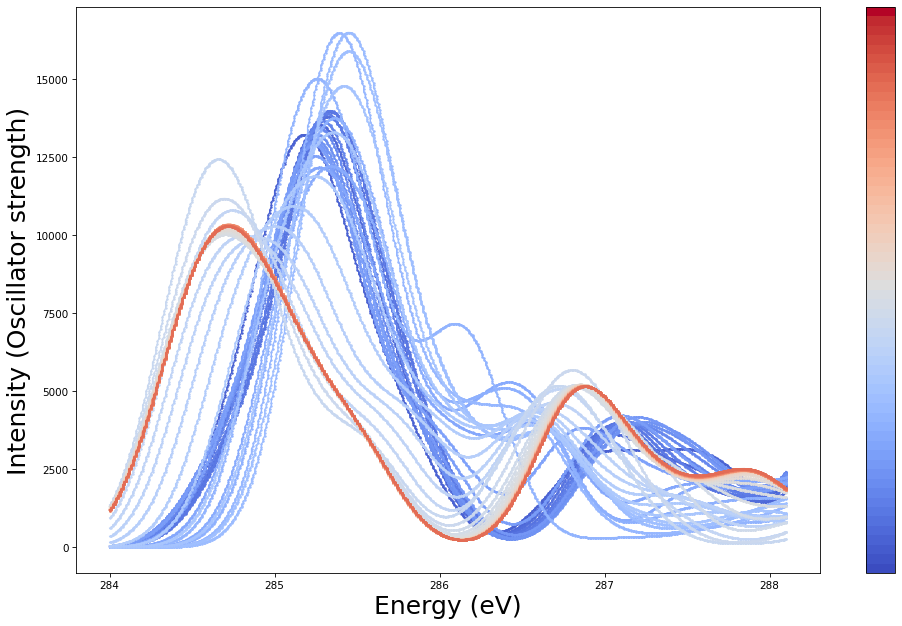

In [17]:
global_name = [globals()['mw_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=283, xmax=288.1, plotsvg=True, nameplt='predge_1stregion.svg')

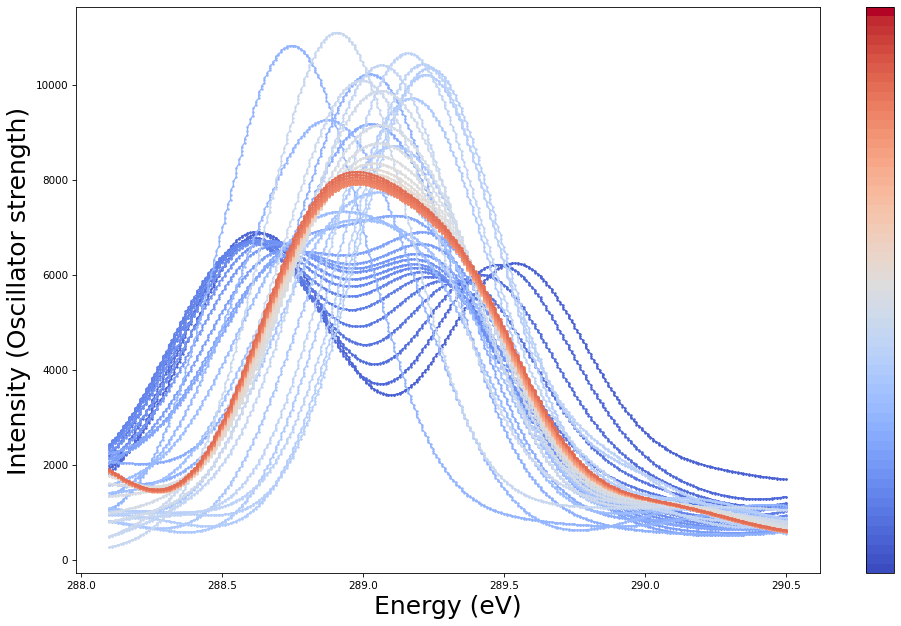

In [18]:
global_name = [globals()['mw_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=288.1, xmax=290.5, plotsvg=True, nameplt='predge_2ndregion.svg')

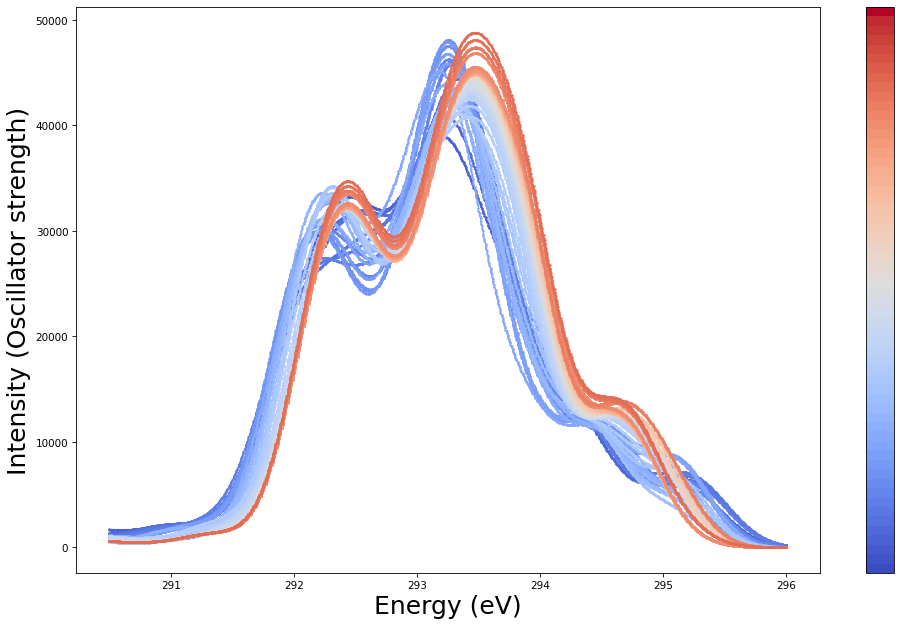

In [19]:
global_name = [globals()['mw_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=290.5, xmax=296, plotsvg=True, nameplt='predge_3rdregion.svg')

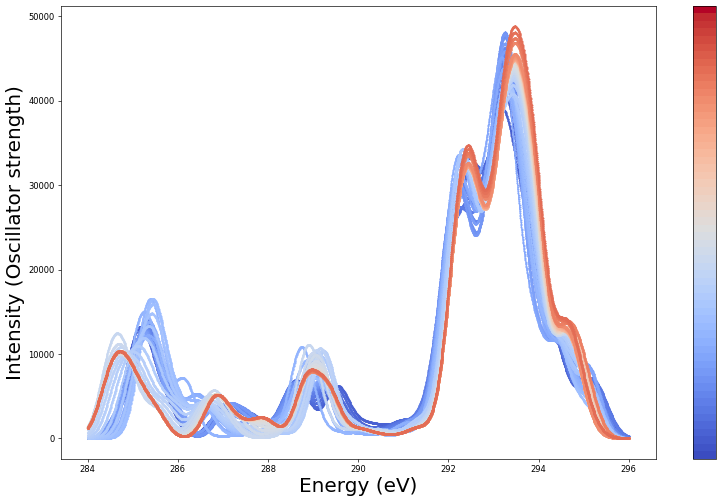

In [20]:
global_name = [globals()['mw_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=60,\
         xlmt=True, xmin=283, xmax=296, plotsvg=True, nameplt='total_predge_regiontest.svg')

In [21]:
#len(list_suf)
colors = matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
#colors[0]

In [22]:
n = 0

In [200]:
print(colors[n],n,n+25)
n+=1

[0.89213754 0.42538874 0.33328927 1.        ] 60 85


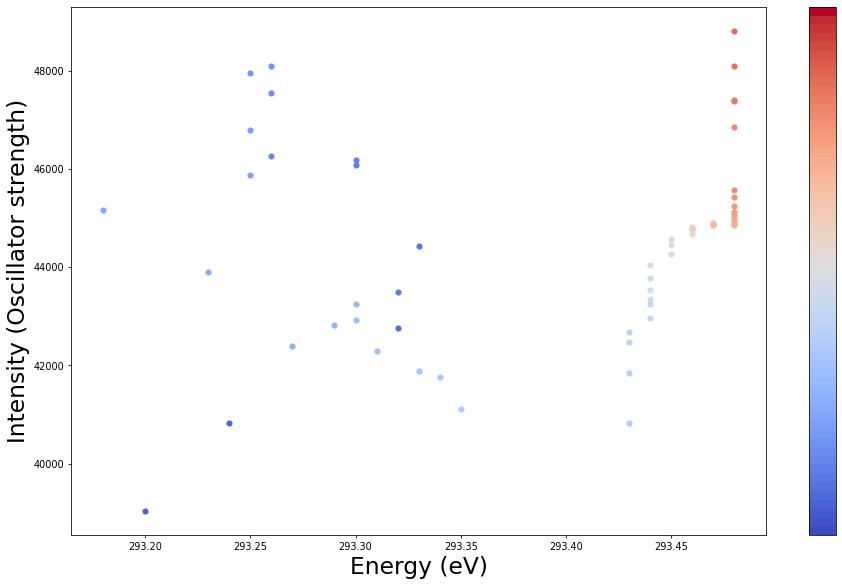

In [50]:
global_name_cut_1 = [getting_max_int(globals()['mw_%s' % str(ii)], 290, 296) \
               for ii in list_suf]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3,\
              plotsvg=True, nameplt='total_IvsE_predge_region2.svg')# xlmt=True, xmin=288.5, xmax=296)

In [320]:
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

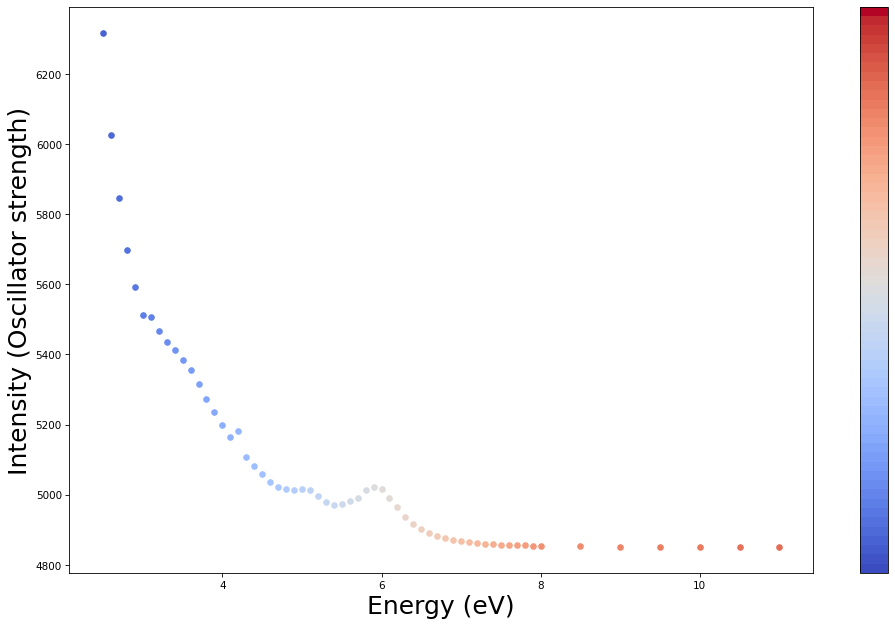

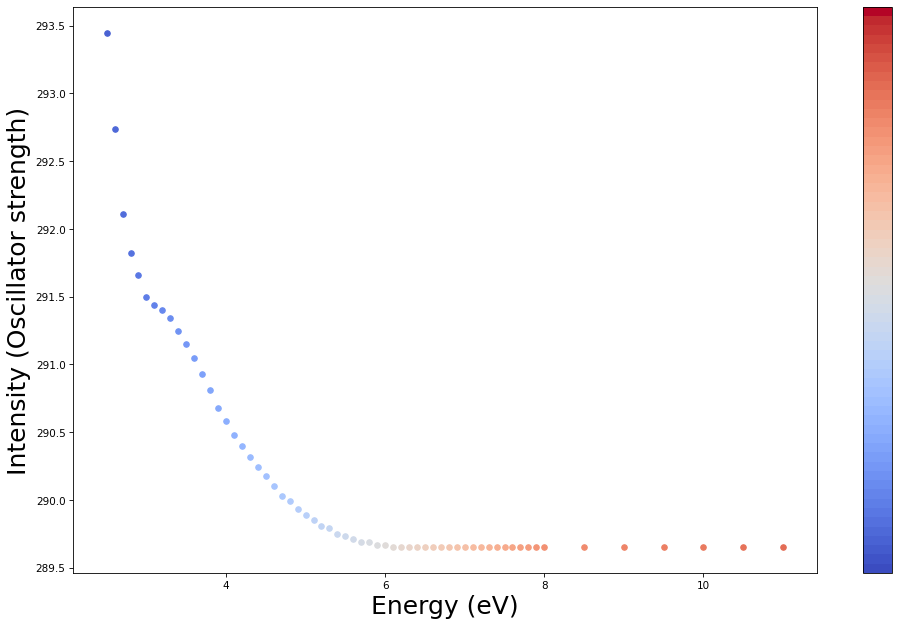

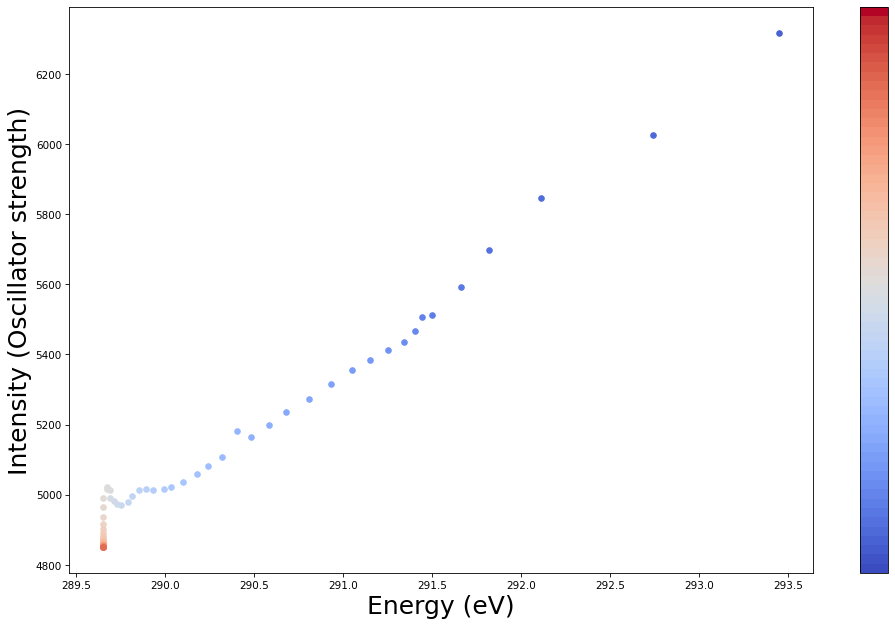

In [338]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 288.5, 296) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
  'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
 #'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
 #'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
#new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
new_df_ei = pd.DataFrame({'Intensity': [global_name_cut_1[cc]['Intensity'] \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=75, markersize=5.3,\
              plotsvg=True, nameplt='Ivsdist_predge_region1pt.svg')
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=75, markersize=5.3)
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=75, markersize=5.3)

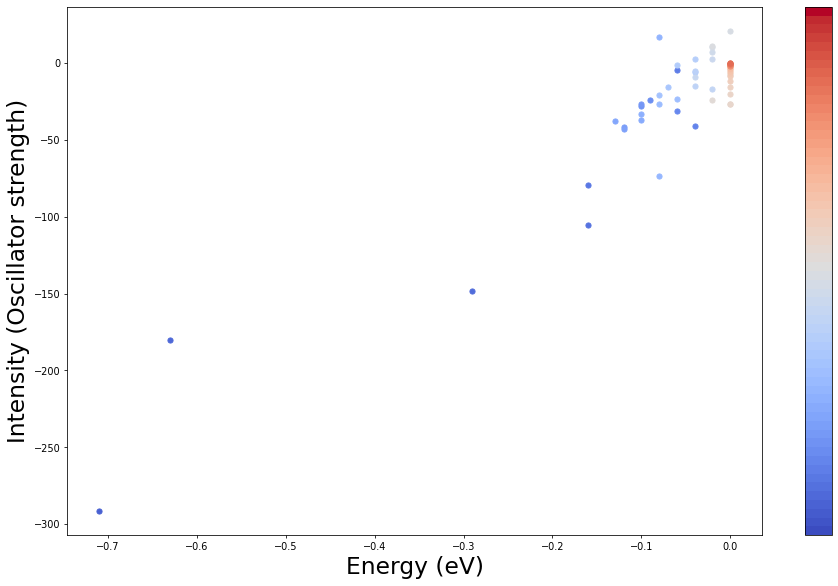

In [26]:
new_evsi = pd.DataFrame({'Energy': [global_name_cut_1[cc+1]['Energy'] - global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf)-1)], \
 'Intensity': [global_name_cut_1[cc+1]['Intensity'] - global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf)-1)]})
neww_evsi = [new_evsi.iloc[ii] for ii in range(len(list_suf)-1)]
plot_alot_xray(neww_evsi, list_suf[:-1], 'Energy', 'Intensity', dpi=70, markersize=5.3)

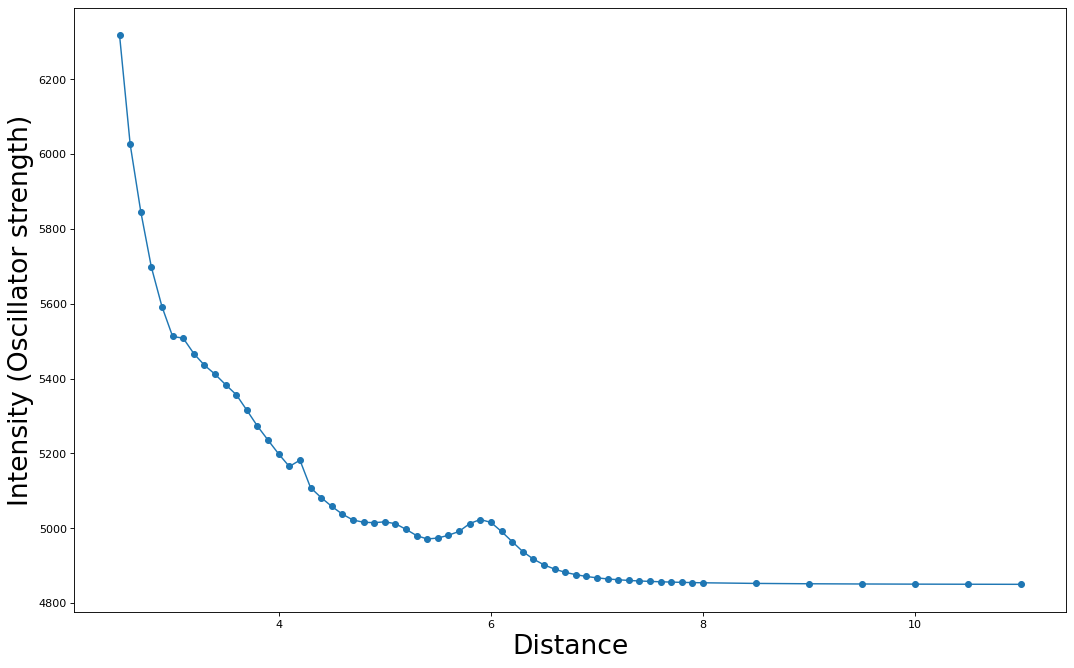

In [27]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=5.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

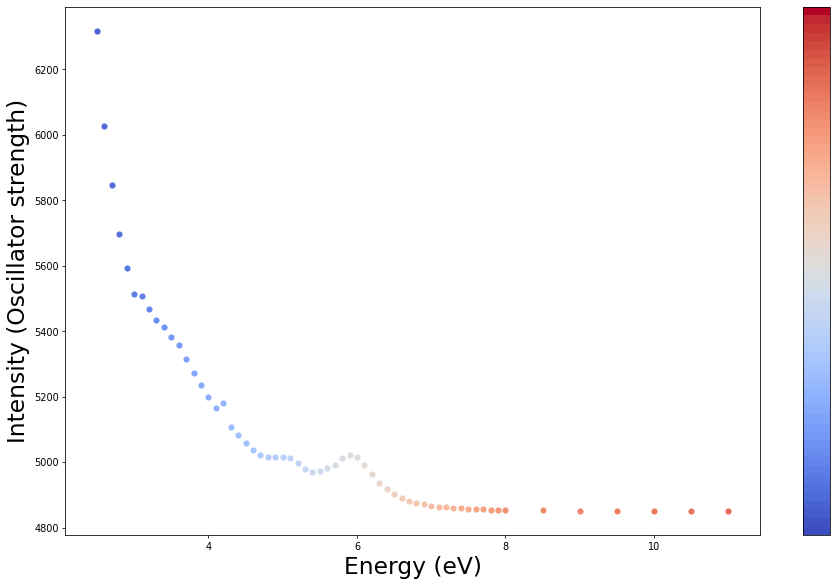

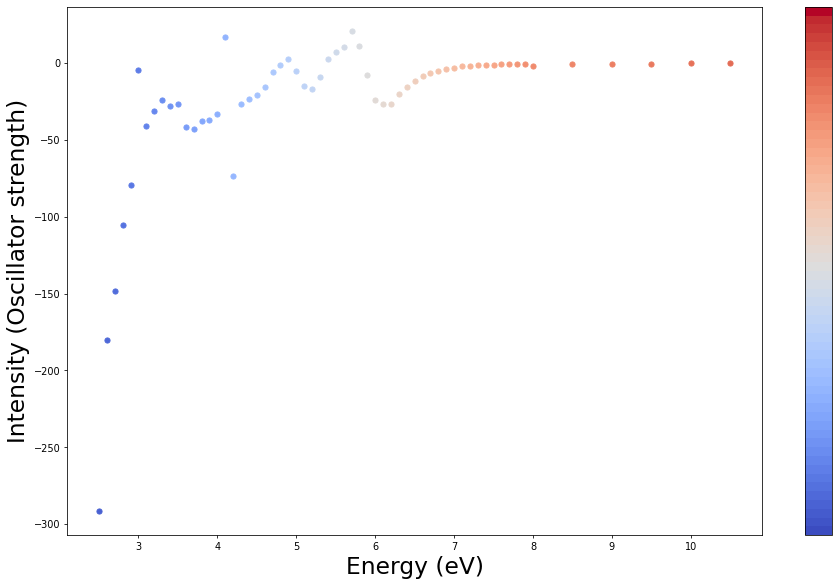

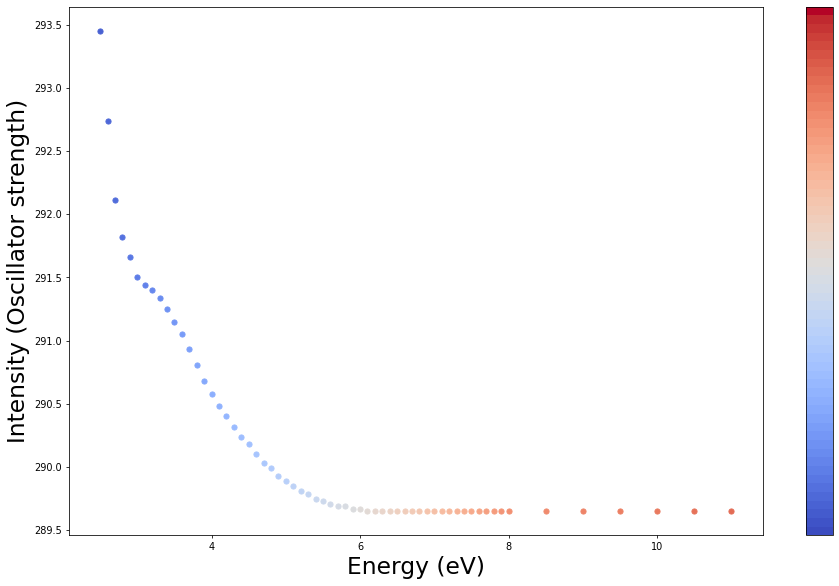

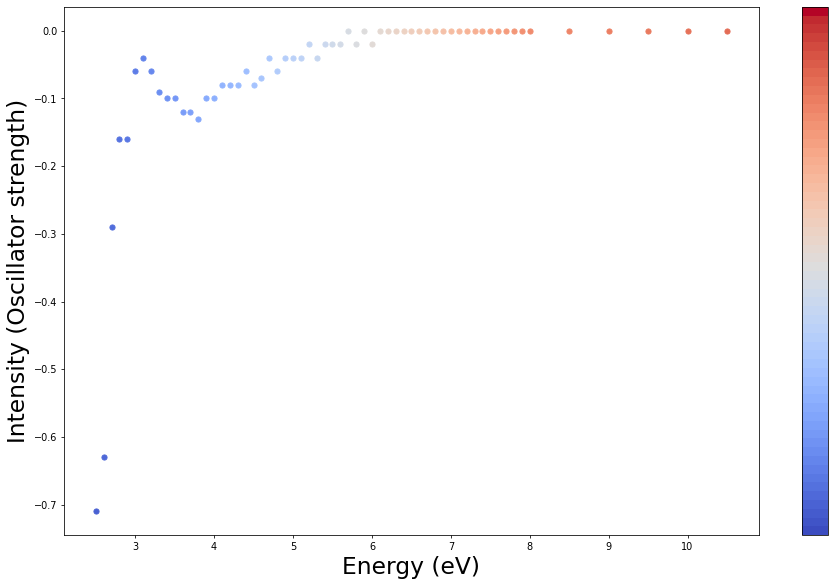

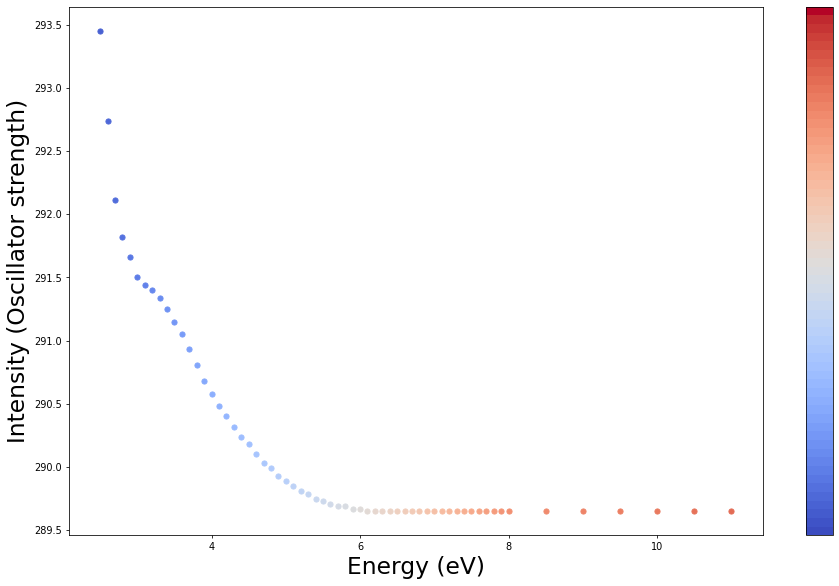

In [339]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
#new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
# 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity']-global_name_cut_1[cc]['Intensity']) \
               for cc in range(len(list_suf)-1)]})




new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
#new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
# 'Energy': [1/math.log(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one

new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Energy': [(global_name_cut_1[cc+1]['Energy']-global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf)-1)]})#favourite one

new_df_6 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy']+(1/global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

neww_df = [new_df.iloc[ii] for ii in range(len(list_suf))]
neww_df_2 = [new_df_3.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_3 = [new_df_4.iloc[ii] for ii in range(len(list_suf))]
neww_df_4 = [new_df_5.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_5 = [new_df_6.iloc[ii] for ii in range(len(list_suf))]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(neww_df, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_2, list_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaI_zone1.svg')
plot_alot_xray(neww_df_3, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_4, list_suf[:-1], 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1.svg')
plot_alot_xray(neww_df_5, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
#, plotsvg=True, nameplt='total_predge_region1.svg')

### new range for draft

In [322]:
list_suf_cut = list_suf[5:42]

In [228]:
#len(new_df_cutreldr)
len(new_df_cutrel)

37

In [244]:
new_df_cutedrel.iloc[0]['Energy']

1.0

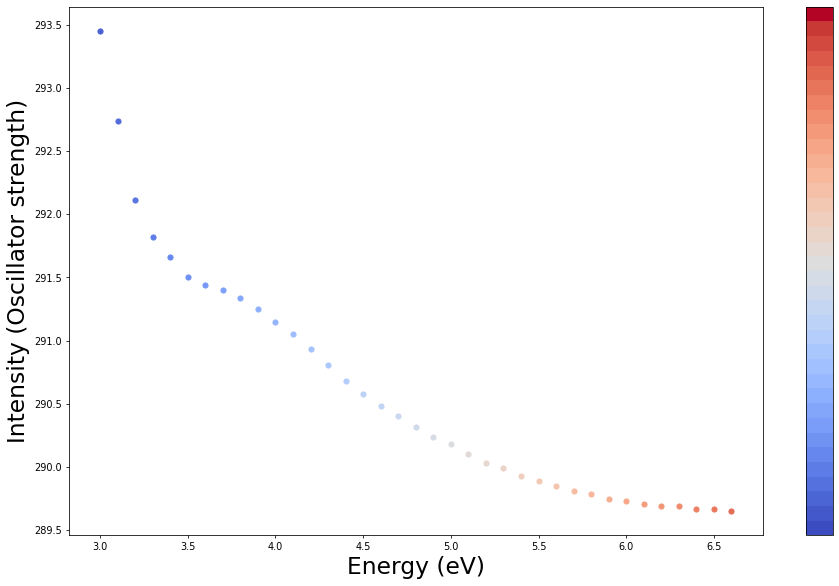

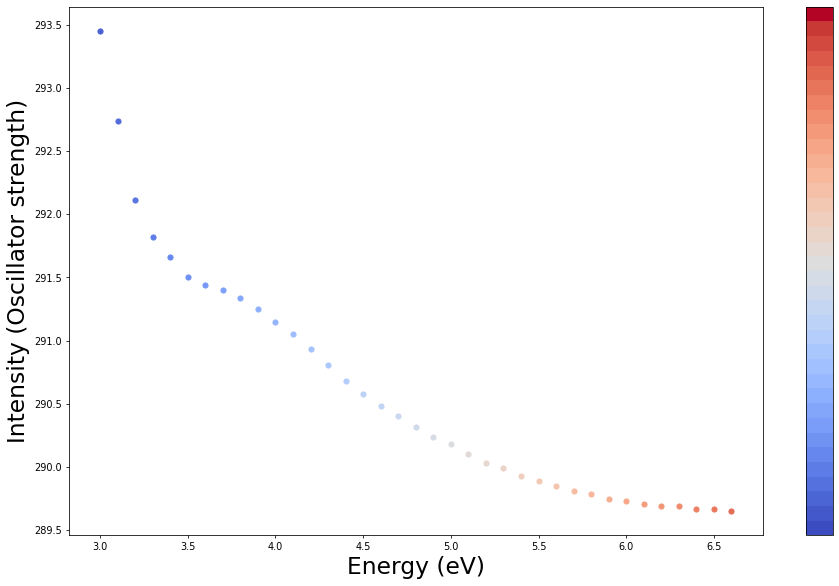

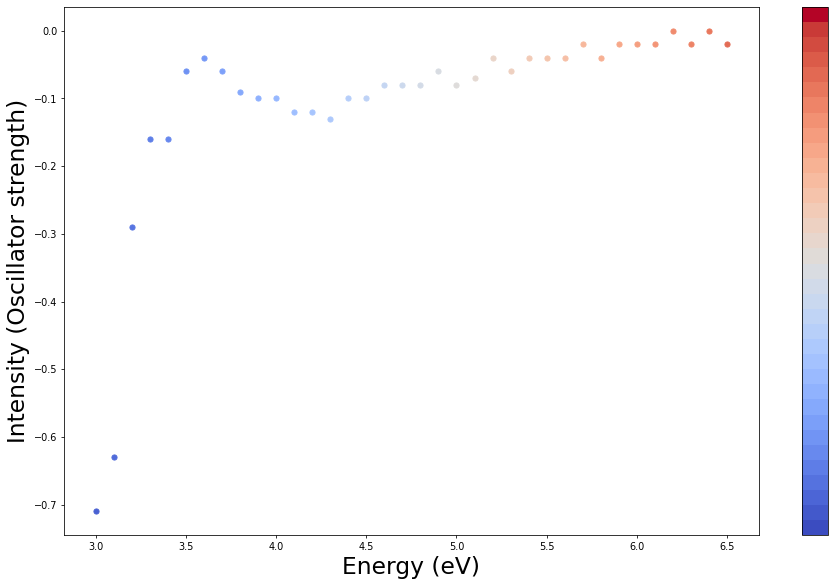

In [342]:
new_df_cutedr = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf_cut))]})
new_df_cutemod = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 #'Energy': [math.exp(-1/(new_df_cutedr.iloc[cc]['Energy'])) \
 'Energy': [(new_df_cutedr.iloc[cc]['Energy']) \
            for cc in range(len(list_suf_cut))]})
new_df_cutedelta = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut)-1)], \
 'Energy': [(new_df_cutemod.iloc[cc+1]['Energy'] - new_df_cutemod.iloc[cc]['Energy']) \
            for cc in range(len(list_suf_cut)-1)]})
neww_df_cutedr = [new_df_cutedr.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutemod = [new_df_cutemod.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutedelta = [new_df_cutedelta.iloc[ii] for ii in range(len(list_suf_cut)-1)]
plot_alot_xray(neww_df_cutedr, list_suf_cut, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutemod, list_suf_cut, 'Distance', 'Energy', dpi=70, markersize=5.3,
               plotsvg=True, nameplt='E_zone1_2.svg')
plot_alot_xray(neww_df_cutedelta, list_suf_cut[:-1], 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1_2.svg')

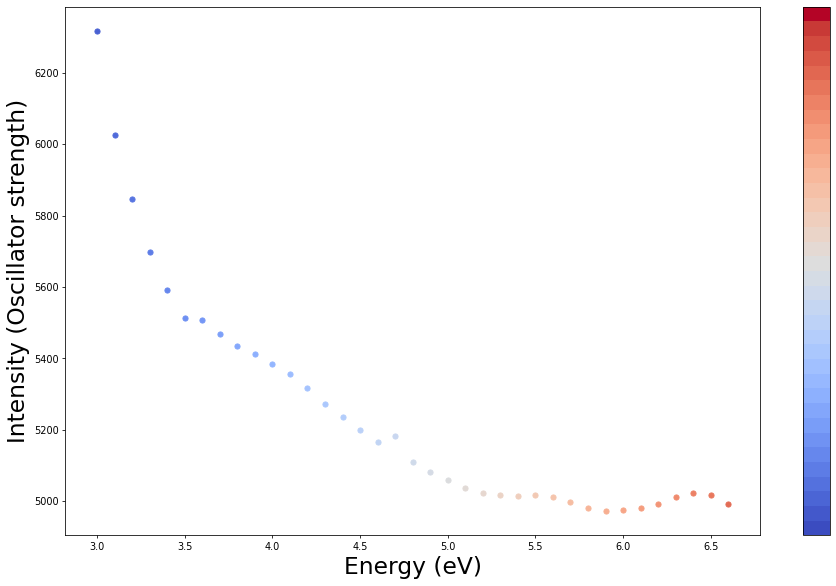

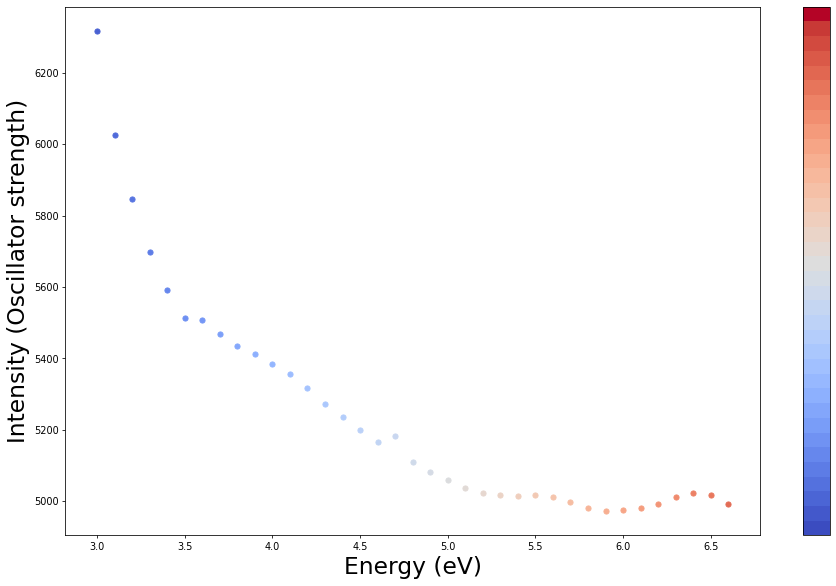

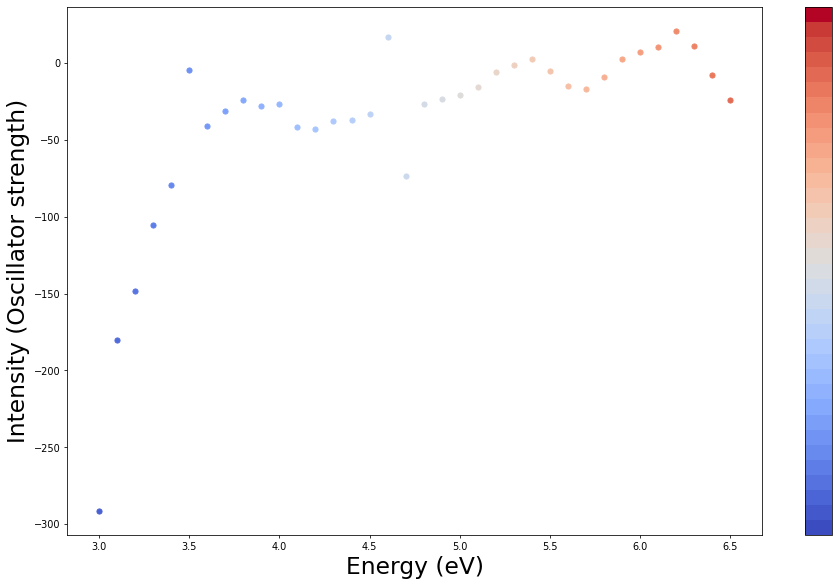

In [332]:
new_df_cutidr = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf_cut))]})
new_df_cutimod = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 #'Intensity': [math.log(new_df_cutidr.iloc[cc]['Intensity']) \
 'Intensity': [(new_df_cutidr.iloc[cc]['Intensity']) \
            for cc in range(len(list_suf_cut))]})
new_df_cutidelta = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut)-1)], \
 'Intensity': [(new_df_cutimod.iloc[cc+1]['Intensity'] - new_df_cutimod.iloc[cc]['Intensity']) \
            for cc in range(len(list_suf_cut)-1)]})
neww_df_cutidr = [new_df_cutidr.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutimod = [new_df_cutimod.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutidelta = [new_df_cutidelta.iloc[ii] for ii in range(len(list_suf_cut)-1)]
plot_alot_xray(neww_df_cutidr, list_suf_cut, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutimod, list_suf_cut, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutidelta, list_suf_cut[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1_2.svg')


4971.3822969559

In [109]:
neww_df_cut[0]

Distance        3.000000
Intensity    2644.831891
Name: 0, dtype: float64

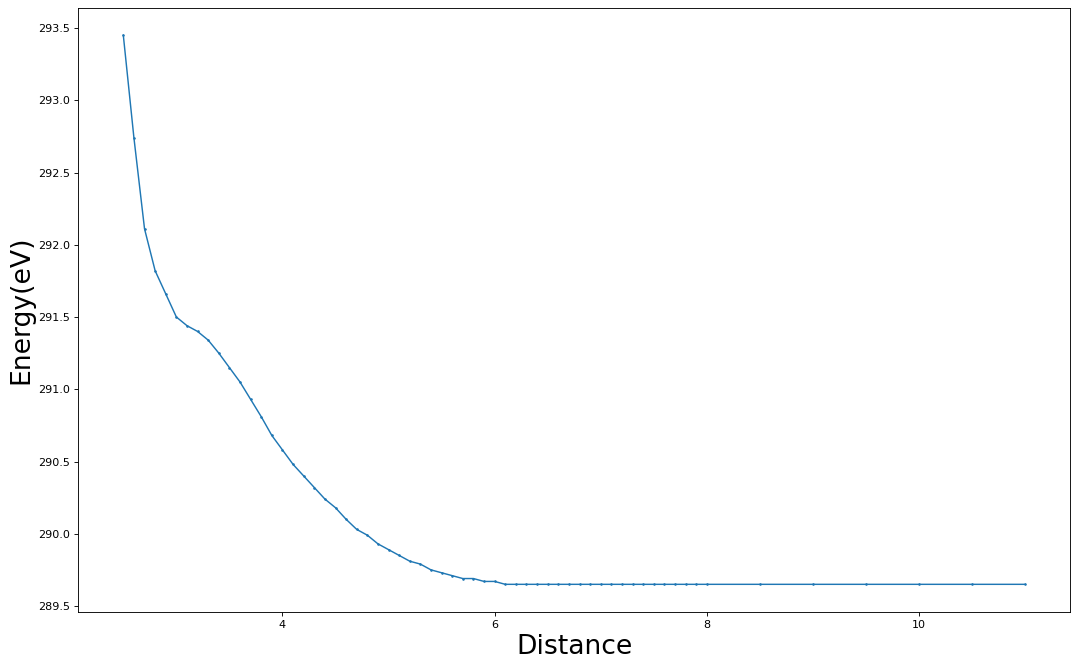

In [30]:
new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new_df_5, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new_df_4, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

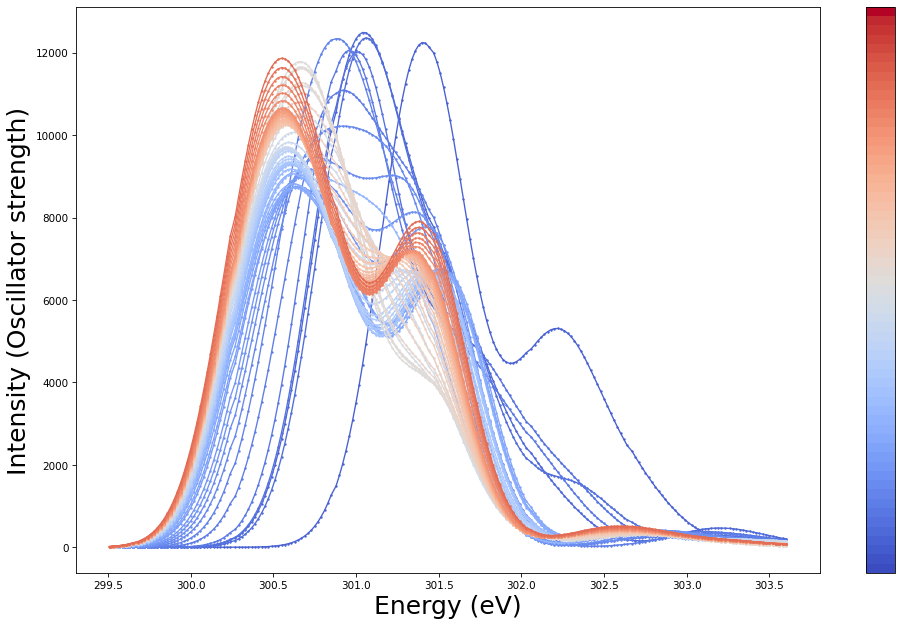

In [31]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=299.5, xmax=303.6)
#plt.savefig("total_predge_region2.svg")

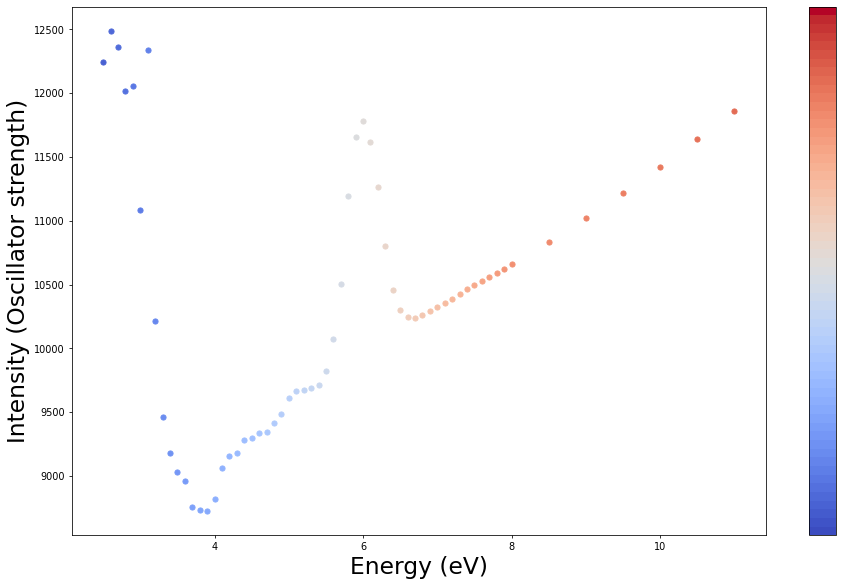

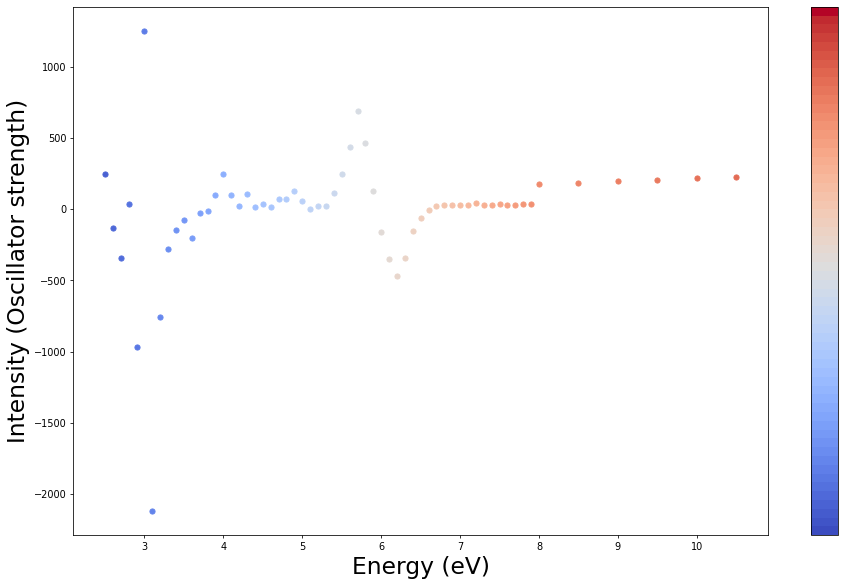

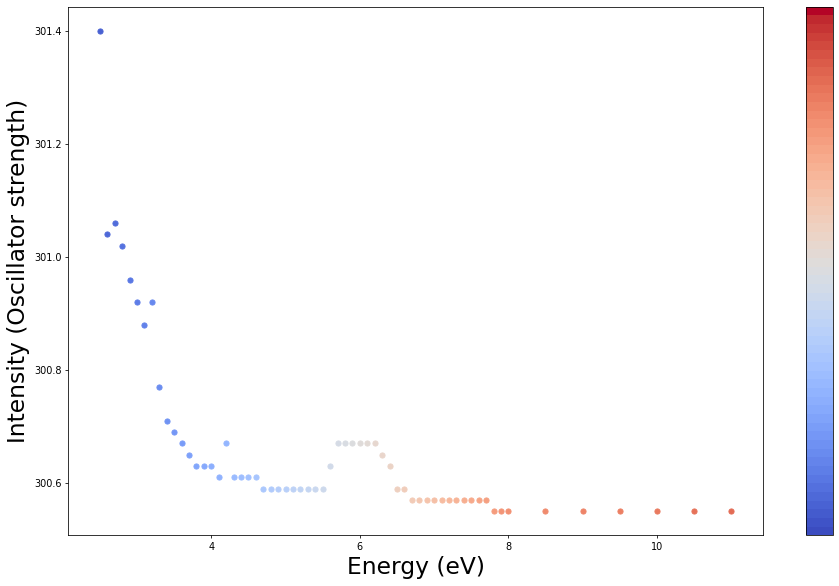

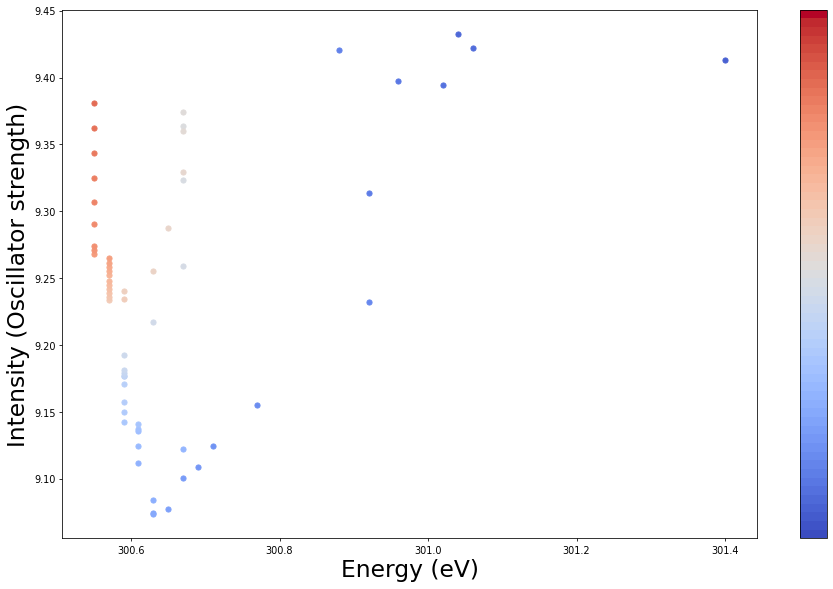

In [333]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 299.5, 303) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})

new_df_idelta = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(new_df_i.iloc[cc+1]['Intensity']-new_df_i.iloc[cc]['Intensity']) for cc in range(len(list_suf)-1)]})
# 'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
# 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_idelta = [new_df_idelta.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)#,\
             # plotsvg=True, nameplt='Ivsdist_predge_region2pt.svg')
plot_alot_xray(neww_df_idelta, list_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaI_zone2.svg')
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='nodeltaE_zone2.svg')
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3)


In [311]:
new_suf=list_suf[5:42]
#new_df_i

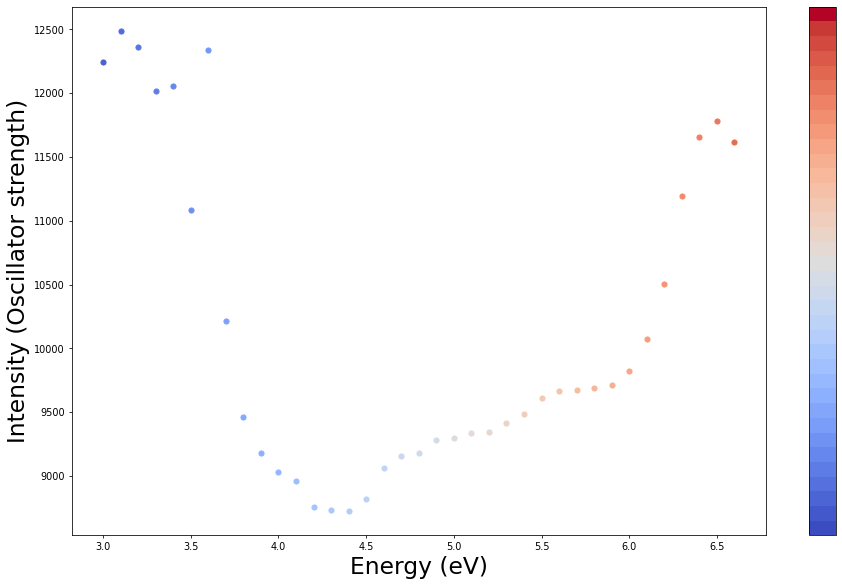

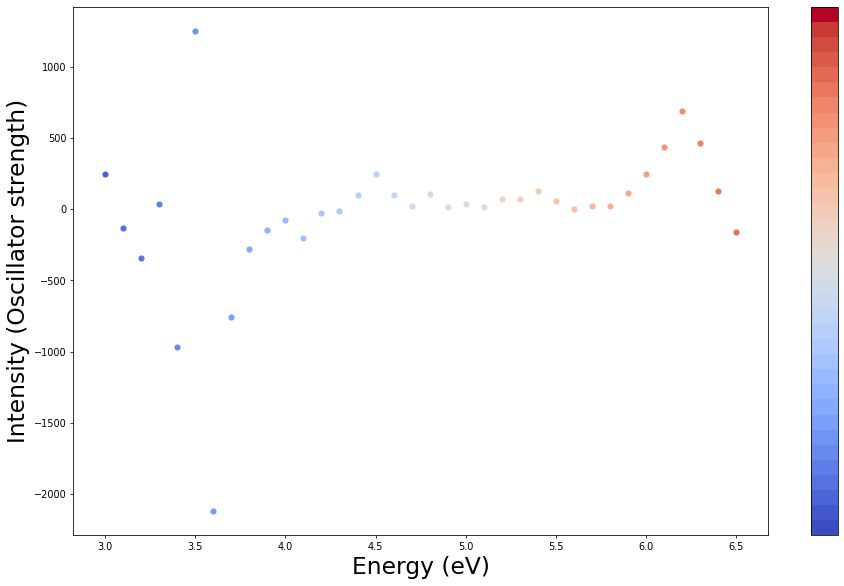

In [316]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 299.5, 303) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(new_suf))]})

new_df_idelta = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf)-1)], \
 'Intensity': [(new_df_i.iloc[cc+1]['Intensity']-new_df_i.iloc[cc]['Intensity']) \
               for cc in range(len(new_suf)-1)]})
# 'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(new_suf))]})
# 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(new_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(new_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(new_suf))]
neww_df_idelta = [new_df_idelta.iloc[ii] for ii in range(len(new_suf)-1)]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(new_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(new_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, new_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)#,\
             # plotsvg=True, nameplt='Ivsdist_predge_region2pt.svg')
plot_alot_xray(neww_df_idelta, new_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3)


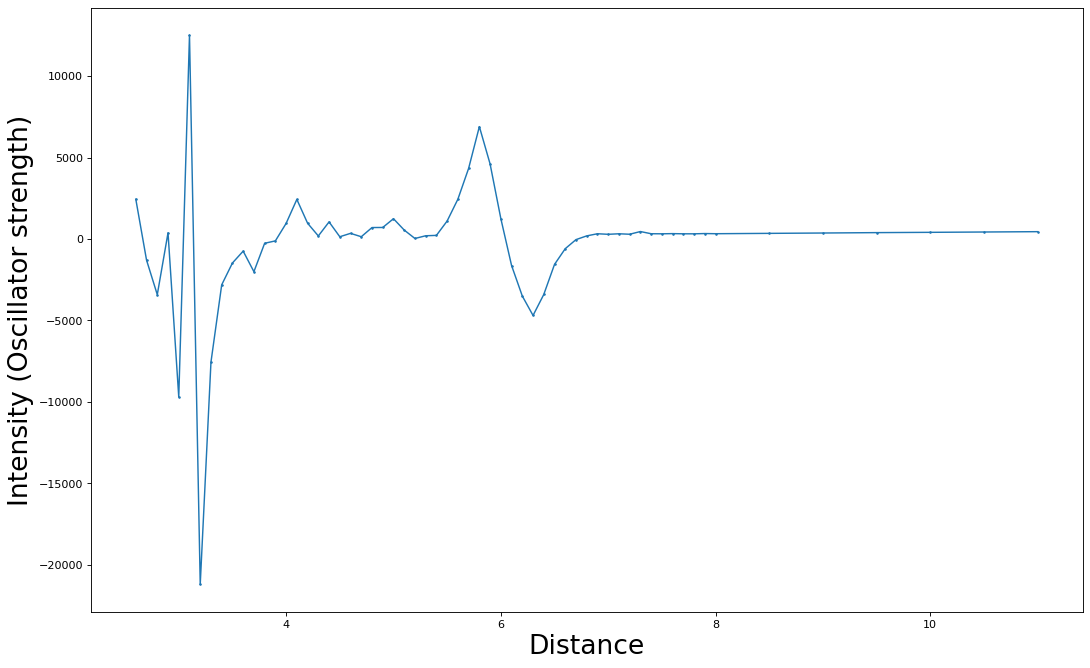

In [33]:
new2_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new2_df_2 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity'] - \
                global_name_cut_1[cc]['Intensity'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
n1.plot(x_arg, y_arg, data=new2_df_2, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
#n1.plot(x_arg, y_arg, data=new2_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

In [34]:
new2_df_2

,Distance,Intensity
0,2.6,2444.479400
1,2.7,-1295.974282
2,2.8,-3414.860647
3,2.9,382.175804
4,3.0,-9695.768360
...,...,...
56,9.0,370.375828
57,9.5,394.631232
58,10.0,412.052838
59,10.5,432.294806


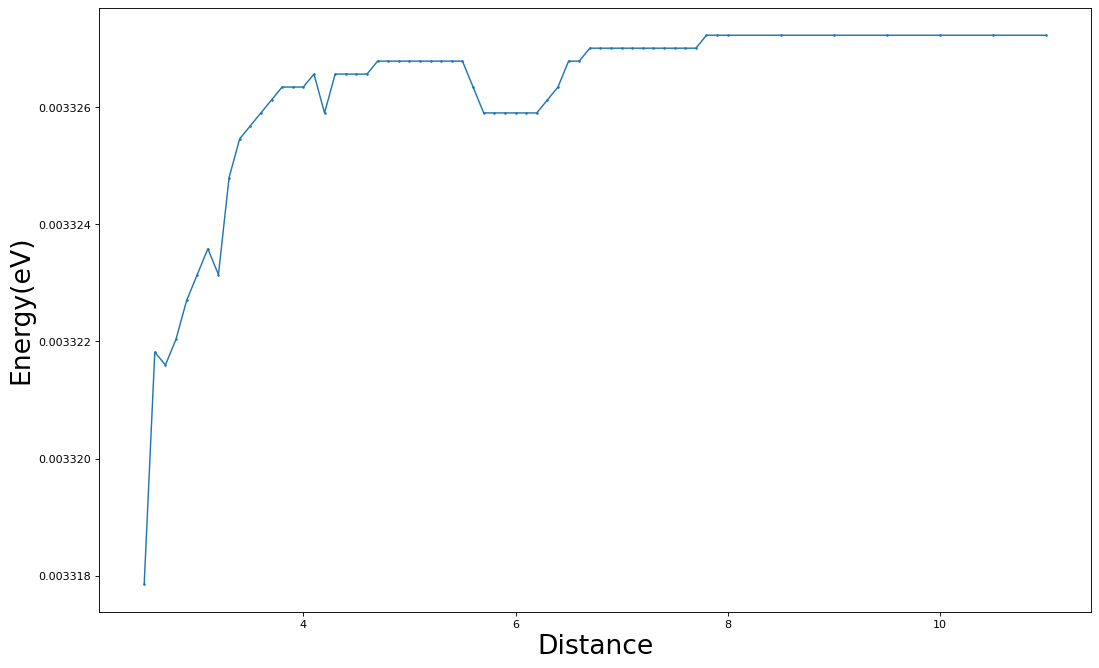

In [35]:
new2_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new2_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new2_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new2_df_4, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

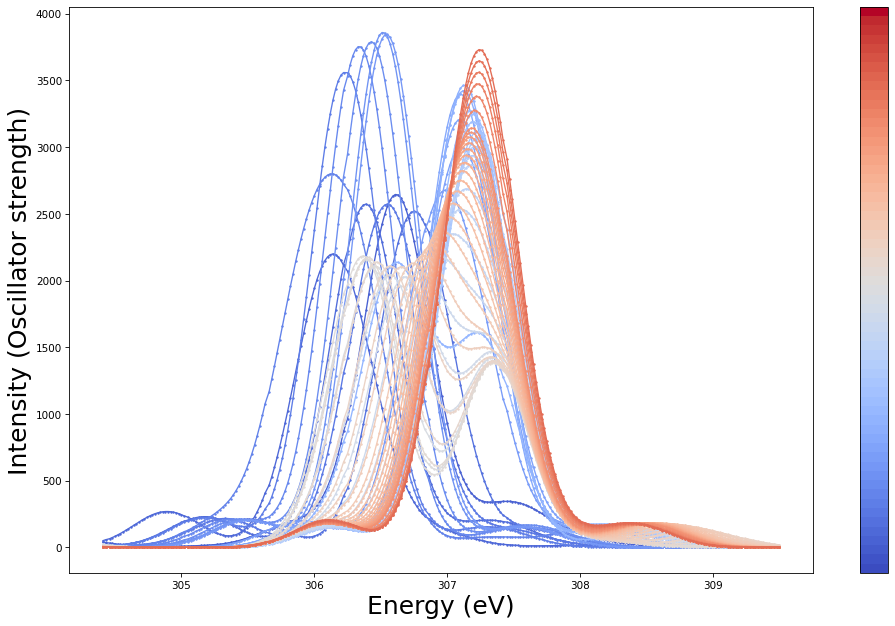

In [36]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=304.4, xmax=309.5)

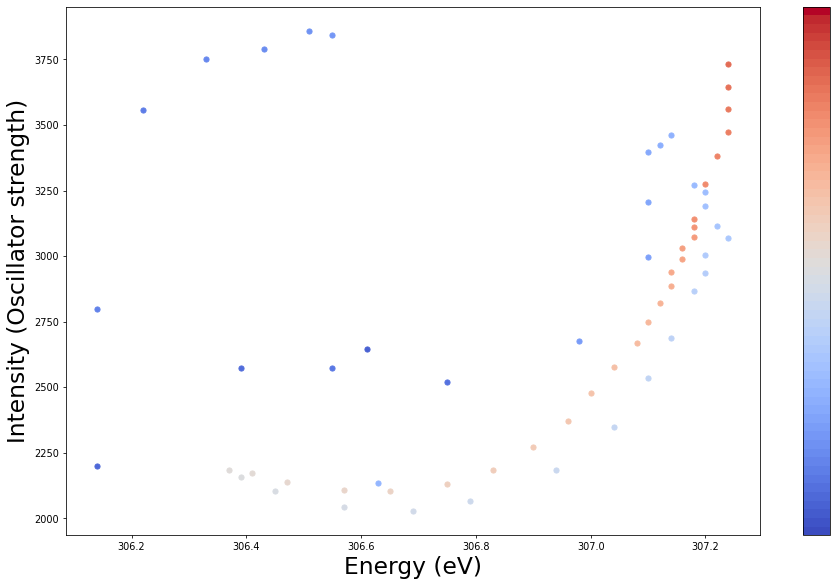

In [37]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 305, 309) \
               for ii in list_suf]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3\
              )# xlmt=True, xmin=288.5, xmax=296)

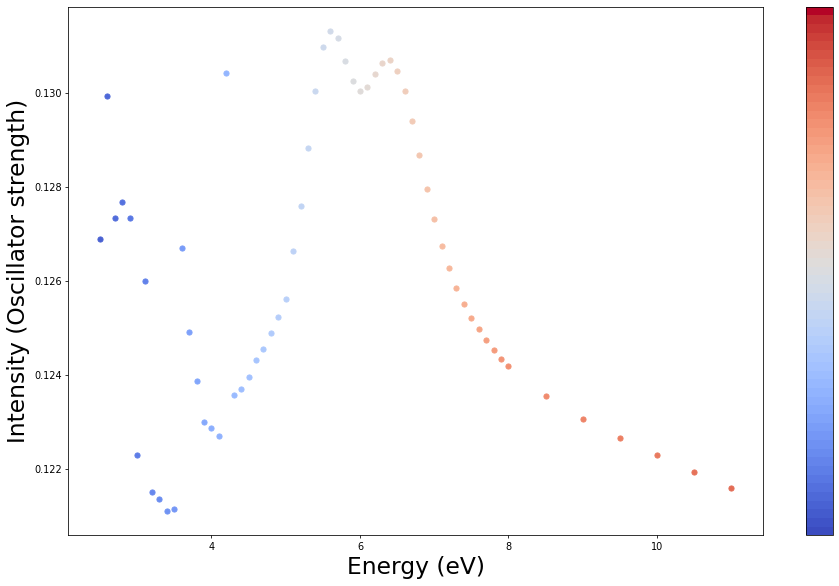

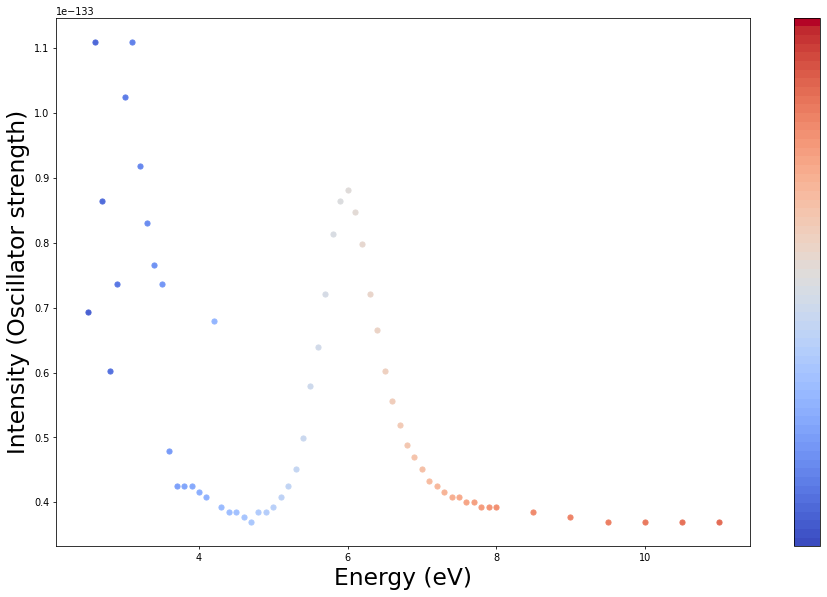

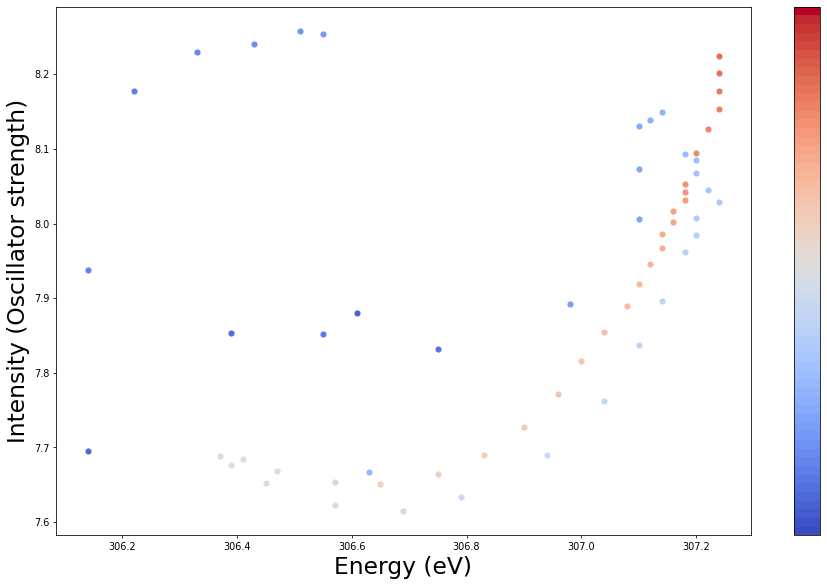

In [38]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 305, 309) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})

new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3)

#label_name = [str(ii/10)+'A' for ii in list_suf]
#plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=75, markersize=5.3\
#              )# xlmt=True, xmin=288.5, xmax=296)

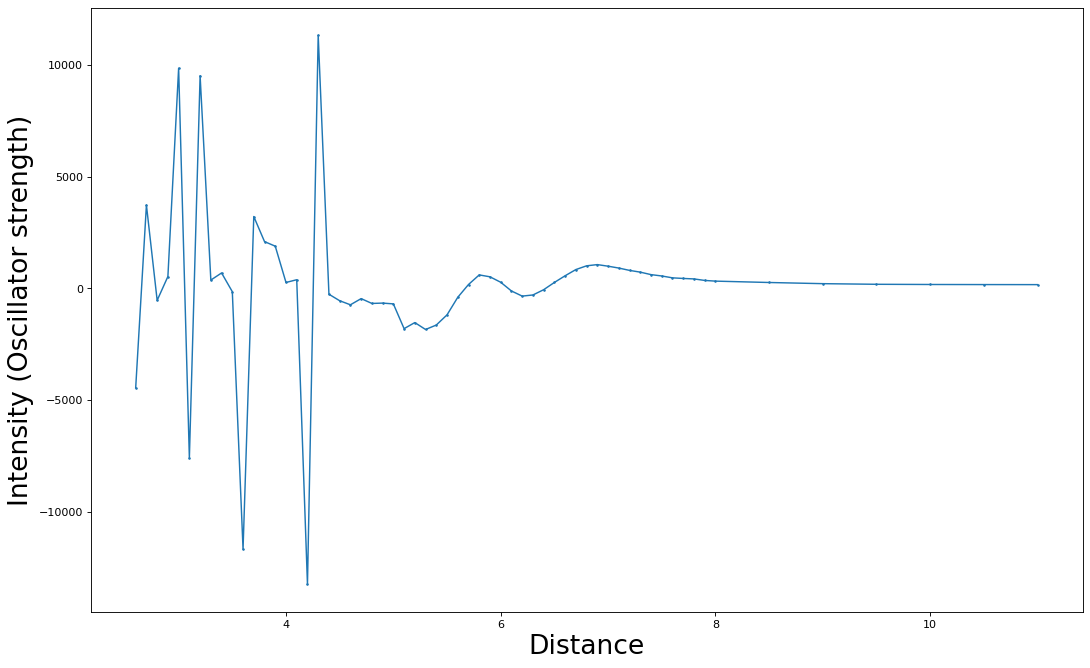

In [39]:
new3_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new3_df_2 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity'] - \
                global_name_cut_1[cc]['Intensity'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
n1.plot(x_arg, y_arg, data=new3_df_2, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
#n1.plot(x_arg, y_arg, data=new3_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

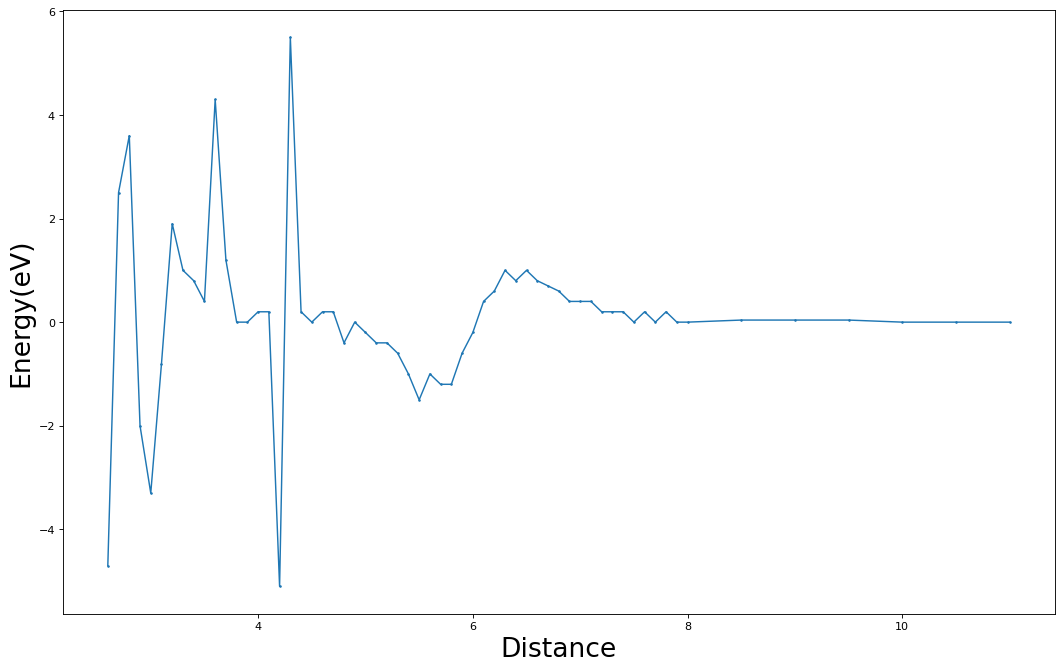

In [40]:
new3_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new3_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new3_df_5 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Energy': [(global_name_cut_1[cc+1]['Energy'] - \
                global_name_cut_1[cc]['Energy'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new3_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new3_df_5, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

In [47]:
list_suf = [i for i in range(30,67)]

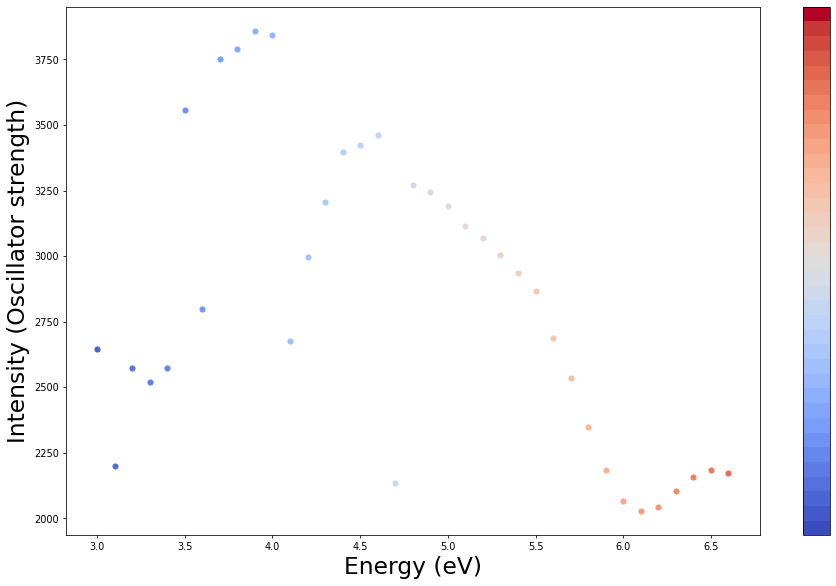

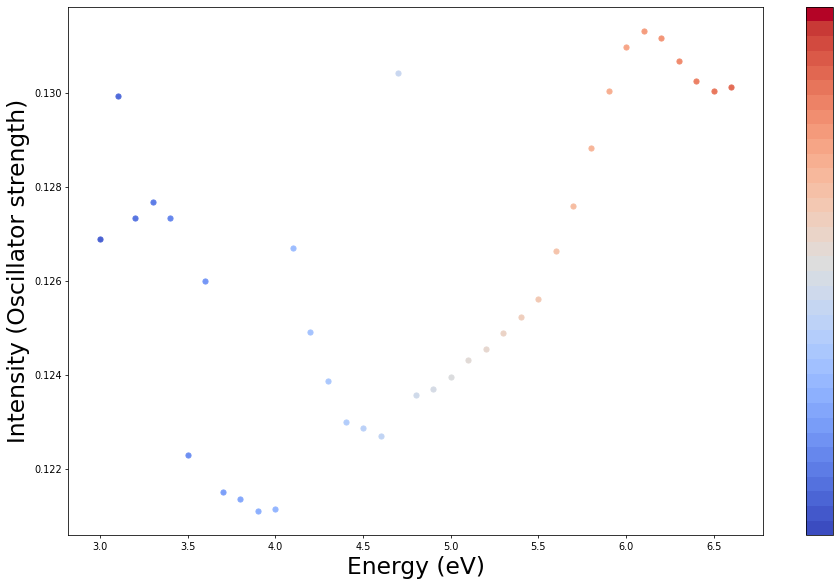

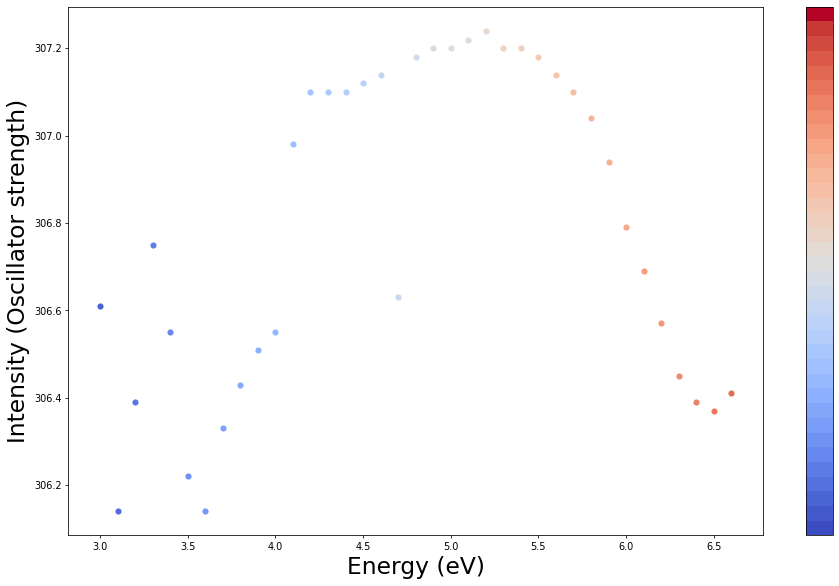

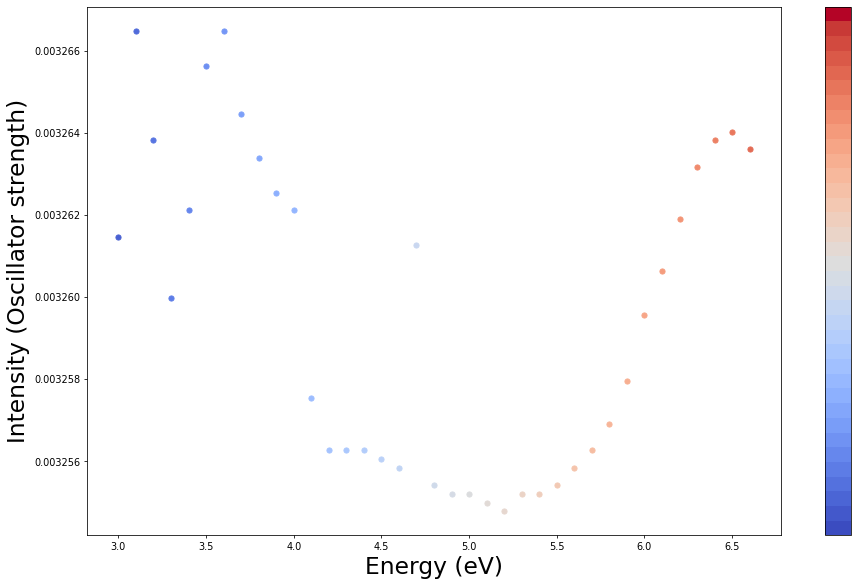

In [48]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one
# 'Energy': [1/math.log(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one

new_df_6 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy']+(1/global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

neww_df = [new_df.iloc[ii] for ii in range(len(list_suf))]
neww_df_2 = [new_df_3.iloc[ii] for ii in range(len(list_suf))]
neww_df_3 = [new_df_4.iloc[ii] for ii in range(len(list_suf))]
neww_df_4 = [new_df_5.iloc[ii] for ii in range(len(list_suf))]
#neww_df_5 = [new_df_6.iloc[ii] for ii in range(len(list_suf))]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(neww_df, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_2, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_3, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_4, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
#plot_alot_xray(neww_df_5, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)